In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from GANime.gan import GAN, plotter
from GANime.datasets import ImageOnlyDataset

In [28]:
from torch.utils.data import DataLoader
import torchvision.transforms as T

resize_transform = T.Compose([
    T.Resize(64),
    T.ToTensor(),
    T.Lambda(lambda x: (255*x).int()/127.5-1) #normalize color channels to -1 and 1
])

ds = ImageOnlyDataset('out2', resize_transform)
dl = DataLoader(ds, batch_size=128, shuffle=True)

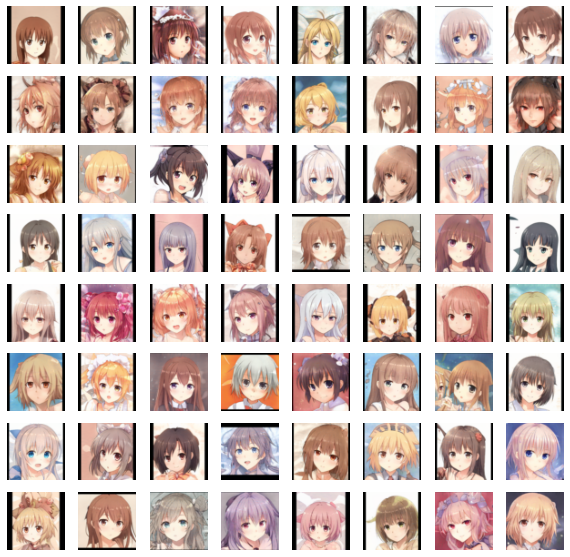

In [34]:
it = next(iter(dl))
plotter(it, rows=8, columns=8, renormalize_func = lambda x: (x*127.5+127.5).astype(int))

In [ ]:
seed_size = 128
gan_model = GAN(seed_size)
gan_model.train(dl,
                num_epochs = 20,
                batch_size = 128,
                plot = True,)

Iteration 0	[Epoch 0/20]	Losses:	 L_discriminator = 1.8242	 L_generator = 5.5356
